In [1]:
import os
import sys
import pandas as pd
import numpy as np

# Import library with current code functions
sys.path.append(os.path.join("..", "lib"))
import neural_network_functions as neural_net_fun
import general_functions as gf
import files_paths as fp

c:\Users\Orlando Mota Pires\miniconda3\envs\t3-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_sequences_path = os.path.join("result_sequences", "DATASET_SEQUENCES_5.CSV")

In [3]:
dataset_sequences_df = pd.read_csv(dataset_sequences_path)

In [4]:
sizes = []

for group in dataset_sequences_df.groupby('label_measures'):
    sizes.append(len(group[1]))
    if len(group[1]) > 30:
        print(f"Size current group: {len(group[1])}")

Size current group: 32
Size current group: 36
Size current group: 47
Size current group: 67
Size current group: 71
Size current group: 40
Size current group: 56
Size current group: 52
Size current group: 38
Size current group: 55
Size current group: 45
Size current group: 33
Size current group: 43
Size current group: 33
Size current group: 41
Size current group: 42
Size current group: 33
Size current group: 39


In [5]:
series_max_len = 30

filtered_dataset_sequences_df = dataset_sequences_df.groupby('label_measures').filter(lambda x: len(x) <= series_max_len)

In [6]:
sizes_filtered = []
for group in filtered_dataset_sequences_df.groupby('label_measures'):
    sizes_filtered.append(len(group[1]))
    if len(group[1]) > 30:
        print(f"Size current group: {len(group[1])}")

In [7]:
filtered_dataset_sequences_df.to_csv(dataset_sequences_path.split('.')[0] + '_' + str(series_max_len) + '_filtered.' + dataset_sequences_path.split('.')[1])

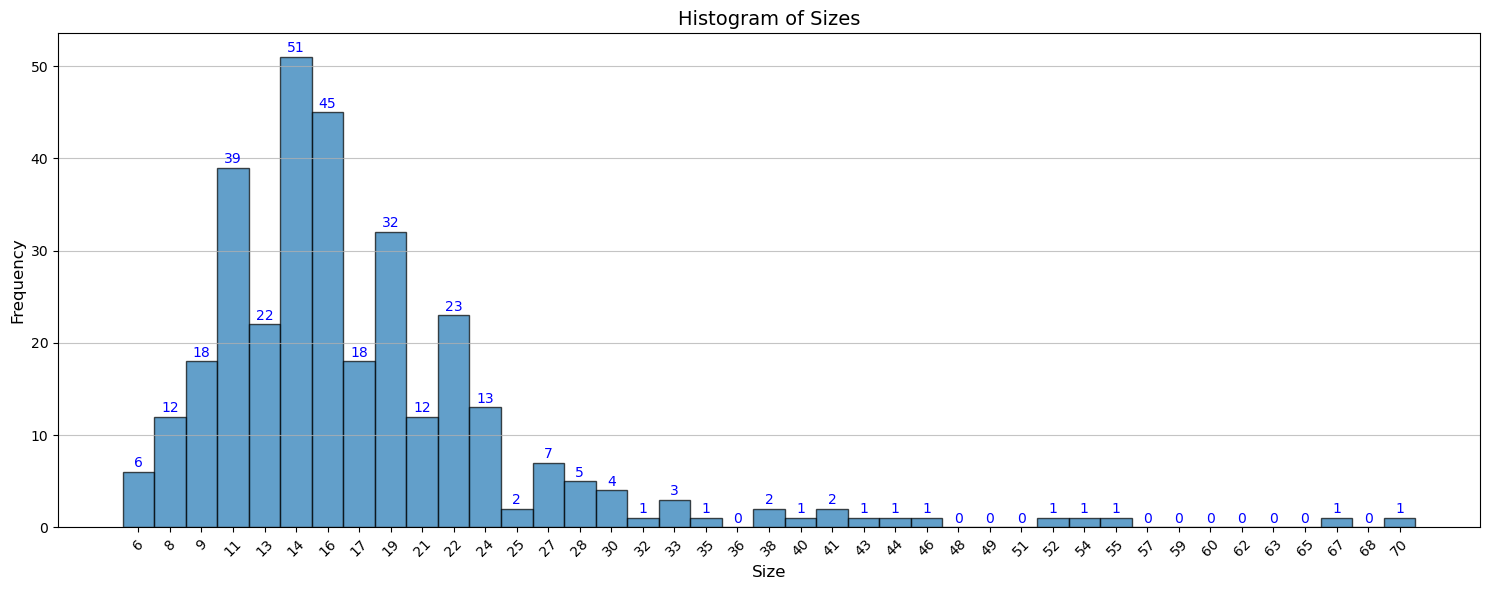

In [8]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(15, 6))

# Get counts, bins, and patches
counts, bins, patches = plt.hist(sizes, bins=41, edgecolor='black', alpha=0.7)

# Calculate bin centers for x-axis labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Average of bin edges to get centers

# Setting custom x-axis labels with bin centers
plt.xticks(bin_centers, [f"{int(center)}" for center in bin_centers], rotation=45, fontsize=10)

# Adding the count of each bin on top of the bars
for count, bin_center in zip(counts, bin_centers):
    plt.text(bin_center, count + 0.5, str(int(count)), ha='center', fontsize=10, color='blue')

# Set titles and labels
plt.title('Histogram of Sizes', fontsize=14)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


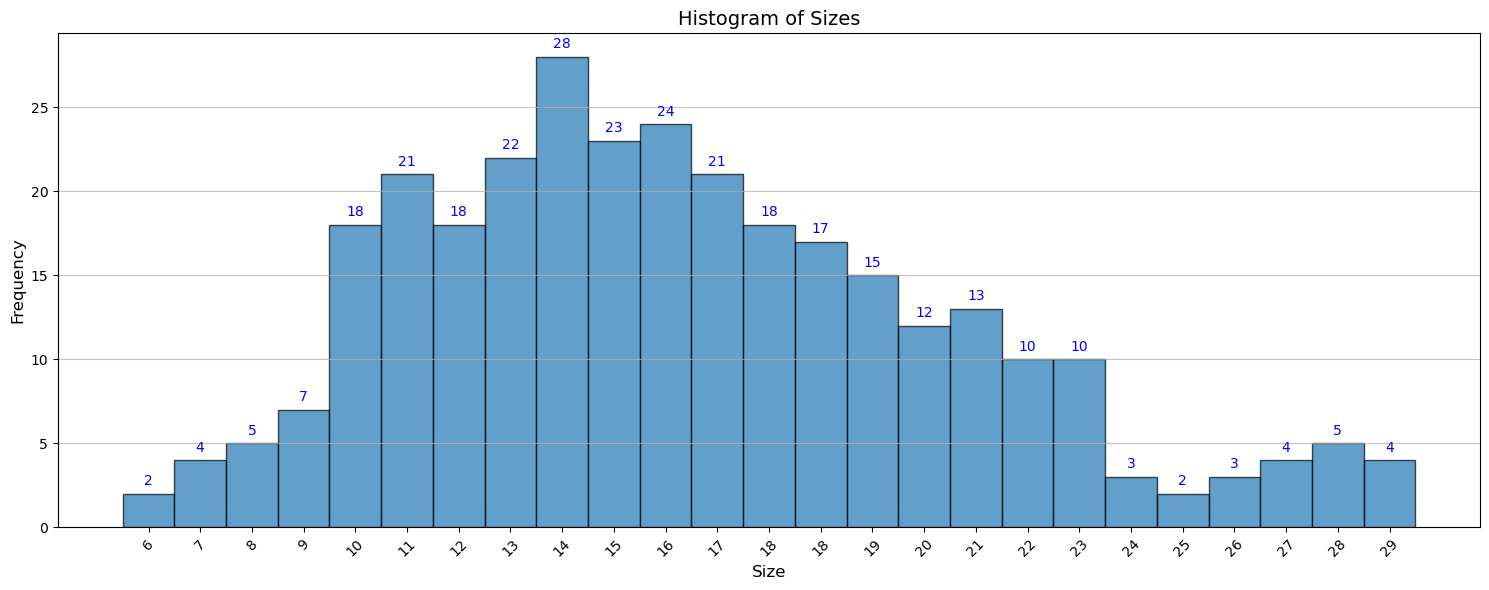

In [9]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(15, 6))

# Get counts, bins, and patches
counts, bins, patches = plt.hist(sizes_filtered, bins=len(set(sizes_filtered)), edgecolor='black', alpha=0.7)

# Calculate bin centers for x-axis labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Average of bin edges to get centers

# Setting custom x-axis labels with bin centers
plt.xticks(bin_centers, [f"{int(center)}" for center in bin_centers], rotation=45, fontsize=10)

# Adding the count of each bin on top of the bars
for count, bin_center in zip(counts, bin_centers):
    plt.text(bin_center, count + 0.5, str(int(count)), ha='center', fontsize=10, color='blue')

# Set titles and labels
plt.title('Histogram of Sizes', fontsize=14)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
